Usamos la pagina de kaggle para descargar una base de datos de las accionesde uber: https://www.kaggle.com/datasets

In [2]:
import pandas as pd
df = pd.read_csv("UBER.csv")
df1 = df.tail(100) 
print( "General information about data set")
print(df.shape)
print(df.tail())
print(df.info())

df["Date"] = pd.to_datetime(df["Date"])
df['Day_of_Week'] = df['Date'].dt.day_name()
print(df.head())
# Calcular el promedio del precio más alto por día
day_price = df.groupby('Day_of_Week')['High'].mean().sort_values(ascending=False)

print("Precio promedio más alto por día:")
print(day_price)

# Encontrar el día con el precio más alto
max_day = day_price.idxmax()
max_price = day_price.max()

print(f"\nEl día más caro (en promedio) es {max_day} con un precio de {max_price:.2f}")

max_row = df.loc[df['High'].idxmax()]
print("\nDía más caro y hora exacta (de cotización):")
print(max_row[['Date', 'High']])

General information about data set
(725, 7)
           Date       Open       High        Low      Close  Adj Close  \
720  2022-03-18  32.520000  33.419998  32.330002  33.360001  33.360001   
721  2022-03-21  32.820000  32.820000  31.250000  31.980000  31.980000   
722  2022-03-22  31.930000  33.599998  31.840000  33.349998  33.349998   
723  2022-03-23  32.709999  33.680000  32.570000  33.060001  33.060001   
724  2022-03-24  34.740002  34.950001  33.439999  34.700001  34.700001   

       Volume  
720  35779700  
721  35200600  
722  21852800  
723  19024700  
724  52492200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       725 non-null    object 
 1   Open       725 non-null    float64
 2   High       725 non-null    float64
 3   Low        725 non-null    float64
 4   Close      725 non-null    float64
 5   Adj Close  725 non-null   

Exactitud promedio del modelo Entrenamiento 0.9989274581172272
Exactitud promedio del modelo de prueba 0.9343418241512489
RMSE del modelo LSTM: 1.80
R²: 0.9343


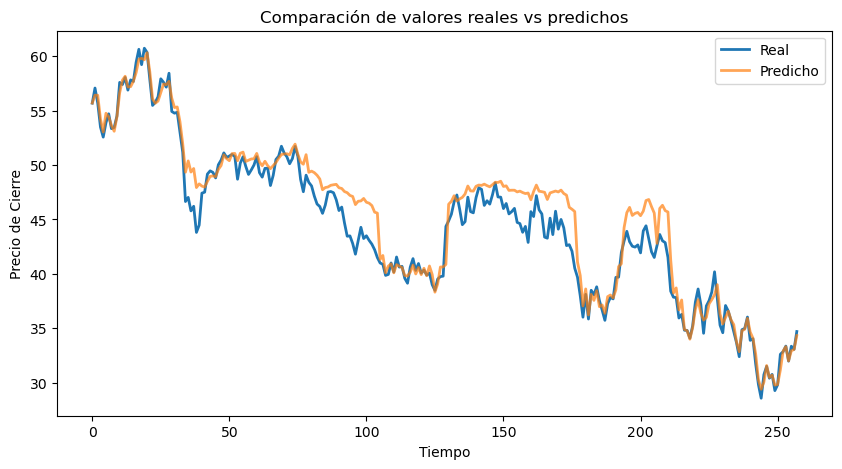

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Supón que ya cargaste df y creaste características
df['Return'] = df['Close'].pct_change()
df['MA5'] = df['Close'].rolling(5).mean()
df['MA10'] = df['Close'].rolling(10).mean()
df['Lag1'] = df['Close'].shift(1)
df = df.dropna()

X = df[['Return', 'MA5', 'MA10', 'Lag1']]
y = df['Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print( "Exactitud promedio del modelo Entrenamiento " + str(model.score(X_train, y_train)) )
print("Exactitud promedio del modelo de prueba " + str(model.score(X_test, y_test)) )
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE del modelo LSTM: {rmse:.2f}")
print(f"R²: {r2:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Real', linewidth=2)
plt.plot(y_pred, label='Predicho', linewidth=2, alpha=0.7)
plt.title('Comparación de valores reales vs predichos')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()



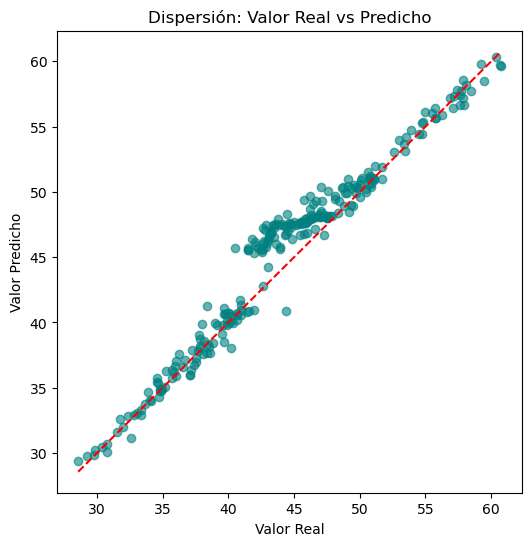

In [19]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.title('Dispersión: Valor Real vs Predicho')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.show()

🔹 Interpretación:

Los puntos cercanos a la línea roja son predicciones buenas.

Si hay puntos muy dispersos, el modelo tiene errores altos.

Te da una idea de si el modelo tiende a sobreestimar o subestimar.

In [4]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Return,MA5,MA10,Lag1
count,716,716.000000,716.000000,716.000000,716.000000,716.000000,7.160000e+02,716.000000,716.000000,716.000000,716.000000
mean,2020-10-22 18:36:12.067038976,40.159922,40.947500,39.256486,40.095796,40.095796,2.440256e+07,0.000435,40.117564,40.148120,40.104944
min,2019-05-23 00:00:00,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06,-0.216288,19.168000,21.603000,14.820000
25%,2020-02-06 18:00:00,32.709999,33.358751,31.887500,32.782500,32.782500,1.422965e+07,-0.019188,32.751499,32.510500,32.782500
50%,2020-10-21 12:00:00,38.885000,39.654999,37.750000,38.485001,38.485001,2.070380e+07,-0.000740,38.543000,38.980000,38.510000
75%,2021-07-09 18:00:00,46.747501,47.555000,45.930000,46.635001,46.635001,2.980862e+07,0.019151,46.639000,46.664750,46.635001
max,2022-03-24 00:00:00,63.250000,64.050003,60.799999,63.180000,63.180000,1.309657e+08,0.382591,61.170000,60.072000,63.180000
std,NaN,9.255176,9.314364,9.130350,9.196956,9.196956,1.571936e+07,0.037286,9.113555,9.016394,9.194839


Exactitud promedio del modelo Entrenamiento 1.0
Exactitud promedio del modelo de prueba 0.5
RMSE del modelo LSTM: 0.71
R²: -1.0080


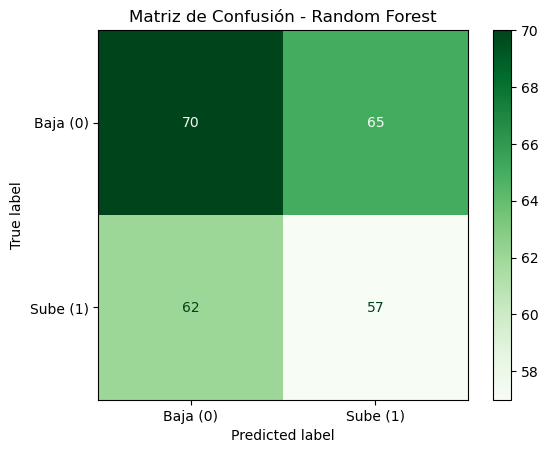

In [20]:
from sklearn.ensemble import RandomForestClassifier
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
count= df['target'].value_counts()


# Supón que ya cargaste df y creaste características
df['Return'] = df['Close'].pct_change()
df['MA5'] = df['Close'].rolling(5).mean()
df['MA10'] = df['Close'].rolling(10).mean()
df['Lag1'] = df['Close'].shift(1)
df = df.dropna()

X = df[['Return', 'MA5', 'MA10', 'Lag1']]
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print( "Exactitud promedio del modelo Entrenamiento " + str(forest.score(X_train, y_train)) )
print("Exactitud promedio del modelo de prueba " + str(forest.score(X_test, y_test)) )

y_pred = forest.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE del modelo LSTM: {rmse:.2f}")
print(f"R²: {r2:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, forest.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Baja (0)', 'Sube (1)'])
disp.plot(cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.show()

RandomForestClassifier = Se usa para predecir datos binarios, por lo que 
La idea era que el modelo aprendiera si el precio sube (1) o baja (0).
el test_size=0.4 lo que nos da un 20% para validación y 20% para testeo

Exactitud promedio del modelo nos da overfit porque tenemos el valor de Exactitud promedio del modelo Entrenamiento 1.0 . por eso la prediccion no es nada precisay el siguiente valor ronda porel 50%


📘 Modelo: Random Forest
RMSE: 1.7948
R²: 0.9322

📘 Modelo: XGBoost
RMSE: 1.6516
R²: 0.9426

📘 Modelo: Ridge
RMSE: 0.8857
R²: 0.9835

📘 Modelo: Lasso
RMSE: 0.4277
R²: 0.9961

📊 RESULTADOS COMPARATIVOS
          Modelo      RMSE        R²
3          Lasso  0.427693  0.996149
2          Ridge  0.885681  0.983487
1        XGBoost  1.651645  0.942573
0  Random Forest  1.794764  0.932190


C:\Users\Laura\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.942e+01, tolerance: 4.010e+00
  model = cd_fast.enet_coordinate_descent(


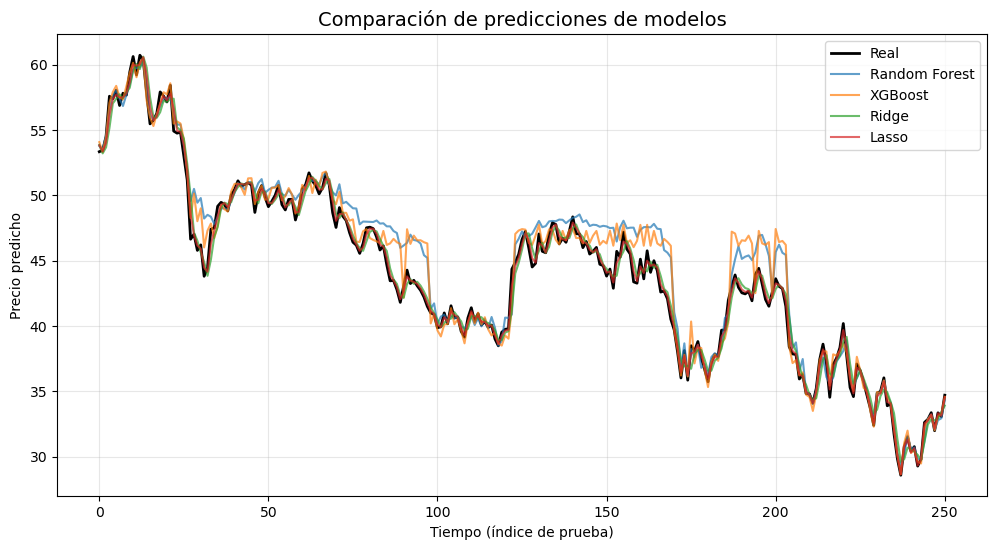

In [21]:
# =========================================
# 🔍 COMPARACIÓN DE MODELOS DE REGRESIÓN
# =========================================

# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost
from xgboost import XGBRegressor

# ===============================
# 1️⃣ Preprocesamiento de datos
# ===============================

# Supongamos que ya cargaste tu DataFrame con precios
# df = pd.read_csv("tus_datos.csv")

# Crear características simples basadas en el cierre
df['Return'] = df['Close'].pct_change()
df['MA5'] = df['Close'].rolling(5).mean()
df['MA10'] = df['Close'].rolling(10).mean()
df['Lag1'] = df['Close'].shift(1)
df.dropna(inplace=True)

# Variables predictoras y objetivo
X = df[['Return', 'MA5', 'MA10', 'Lag1']]
y = df['Close']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, shuffle=False
)

# ===============================
# 2️⃣ Definición de modelos
# ===============================
modelos = {
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001)
}

resultados = []

# ===============================
# 3️⃣ Entrenamiento y evaluación
# ===============================
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    resultados.append({
        "Modelo": nombre,
        "RMSE": rmse,
        "R²": r2,
    })
    
    print(f"\n📘 Modelo: {nombre}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

# ===============================
# 4️⃣ Resultados comparativos
# ===============================
resultados_df = pd.DataFrame(resultados).sort_values("RMSE")
print("\n===============================")
print("📊 RESULTADOS COMPARATIVOS")
print("===============================")
print(resultados_df)

# ===============================
# 5️⃣ Visualización
# ===============================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Real", color='black', linewidth=2)

# Graficar predicciones de cada modelo
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    plt.plot(y_pred, label=nombre, alpha=0.7)

plt.title("Comparación de predicciones de modelos", fontsize=14)
plt.xlabel("Tiempo (índice de prueba)")
plt.ylabel("Precio predicho")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [17]:
# =========================================
# 🔍 MODELO LSTM PARA SERIES DE TIEMPO
# =========================================

# 1️⃣ Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# =========================================
# 2️⃣ Preparar los datos
# =========================================

# Supongamos que ya tienes tu DataFrame con precios
# df = pd.read_csv("tus_datos.csv")
# Debe tener una columna llamada 'Close'

data = df[['Close']].copy()

# Escalar los datos entre 0 y 1 (muy importante para redes neuronales)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Definir tamaño de la ventana (cuántos días atrás mira el modelo)
lookback = 30  # puedes probar 10, 30, 60

X, y = [], []

for i in range(lookback, len(data_scaled)):
    X.append(data_scaled[i - lookback:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)

# Cambiar forma para LSTM: [muestras, pasos de tiempo, características]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Dividir entrenamiento / prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# =========================================
# 3️⃣ Construir el modelo LSTM
# =========================================

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# =========================================
# 4️⃣ Entrenar el modelo
# =========================================

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# =========================================
# 5️⃣ Predicciones
# =========================================

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_real = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_real, predictions))
r2 = r2_score(y_test, y_pred)
print(f"RMSE del modelo LSTM: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# =========================================
# 6️⃣ Visualización
# =========================================

plt.figure(figsize=(12,6))
plt.plot(y_real, label='Valor real', color='black')
plt.plot(predictions, label='Predicción LSTM', color='red', alpha=0.7)
plt.title("Predicción de precios con LSTM", fontsize=14)
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


C:\Users\Laura\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0682 - val_loss: 0.0120
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0163 - val_loss: 0.0103
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - val_loss: 0.0039
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0076 - val_loss: 0.0032
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0081 - val_loss: 0.0030
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0064 - val_loss: 0.0029
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0062 - val_loss: 0.0028
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0060 - val_loss: 0.0032
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0059 - val_loss: 0.0035
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0058 - val_loss: 0.0029
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0

ValueError: Found input variables with inconsistent numbers of samples: [125, 262]

Epoch 1/50


C:\Users\Laura\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0836 - val_loss: 0.0078
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0129 - val_loss: 0.0038
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0086 - val_loss: 0.0034
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0067 - val_loss: 0.0038
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0065 - val_loss: 0.0034
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0066 - val_loss: 0.0037
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0064 - val_loss: 0.0038
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0067 - val_loss: 0.0028
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0055 - val_loss: 0.0026
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0053 - val_loss: 0.0028
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0049 - val_l

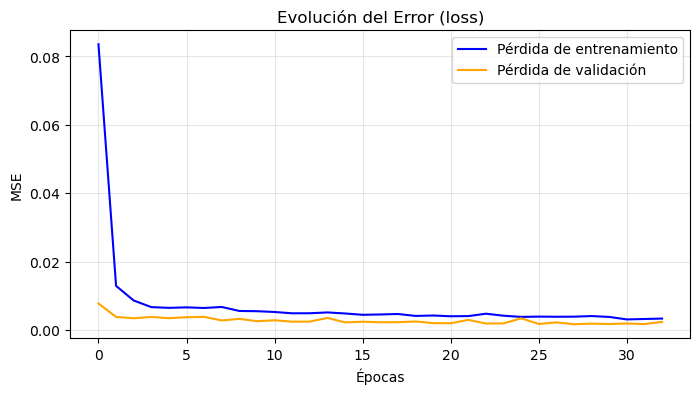

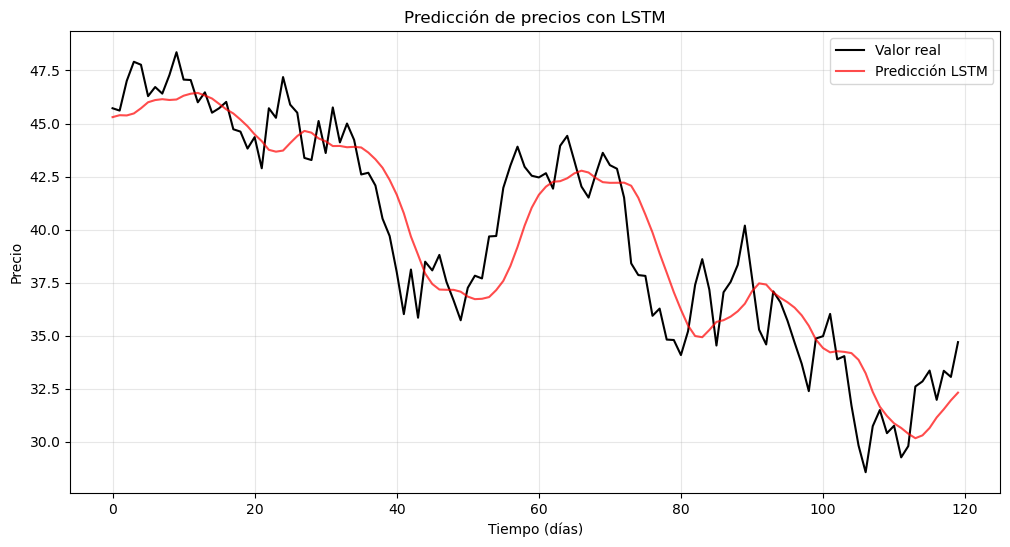

In [24]:
# =========================================
# 🔹 1. Librerías
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# =========================================
# 🔹 2. Preparación de datos
# =========================================
# Supongamos que ya tienes tu DataFrame con una columna "Close"
# df = pd.read_csv("tus_datos.csv")

data = df[['Close']].copy()

# Normalizar entre 0 y 1 para que la red aprenda más rápido
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Cuántos días atrás tomará el modelo para predecir
lookback = 30

X, y = [], []
for i in range(lookback, len(data_scaled)):
    X.append(data_scaled[i - lookback:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Separar entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# =========================================
# 🔹 3. Construcción del modelo LSTM
# =========================================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# =========================================
# 🔹 4. Entrenamiento del modelo
# =========================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

# =========================================
# 🔹 5. Predicciones
# =========================================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_real = scaler.inverse_transform(y_test.reshape(-1, 1))

# Métricas
rmse = np.sqrt(mean_squared_error(y_real, predictions))
r2 = r2_score(y_real, predictions)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# =========================================
# 🔹 6. Visualización de resultados
# =========================================

# --- Pérdida durante el entrenamiento ---
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida de validación', color='orange')
plt.title('Evolución del Error (loss)')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- Predicciones vs valores reales ---
plt.figure(figsize=(12,6))
plt.plot(y_real, label='Valor real', color='black')
plt.plot(predictions, label='Predicción LSTM', color='red', alpha=0.7)
plt.title('Predicción de precios con LSTM')
plt.xlabel('Tiempo (días)')
plt.ylabel('Precio')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



In [6]:
# Tomar los últimos "lookback" días del conjunto de datos
last_window = data_scaled[-lookback:]

# Redimensionar a [1, pasos de tiempo, características]
last_window = np.reshape(last_window, (1, lookback, 1))

# Predecir el siguiente valor
next_pred_scaled = model.predict(last_window)

# Desescalar (llevar a valores reales)
next_pred = scaler.inverse_transform(next_pred_scaled)

print(f"📈 Predicción del siguiente día: {next_pred[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
📈 Predicción del siguiente día: 33.01


In [7]:
future_days = 10
future_predictions = []

last_window = data_scaled[-lookback:].copy()

for _ in range(future_days):
    # Redimensionar y predecir
    pred_scaled = model.predict(last_window.reshape(1, lookback, 1))
    # Guardar la predicción
    future_predictions.append(pred_scaled[0, 0])
    
    # Actualizar la ventana: quitar el más antiguo, agregar el nuevo
    last_window = np.append(last_window[1:], pred_scaled)
    
# Convertir predicciones a valores reales
future_predictions_real = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Mostrar resultados
for i, val in enumerate(future_predictions_real):
    print(f"Día +{i+1}: {val[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Día +1: 33.01
Día +2: 33.29
Día +3: 33.46
Día +4: 33.56
Día +5: 33.62
Día +6: 33.65
Día +7: 33.67
Día +8: 33.67
Día +9: 33.67
Día +10: 33.66


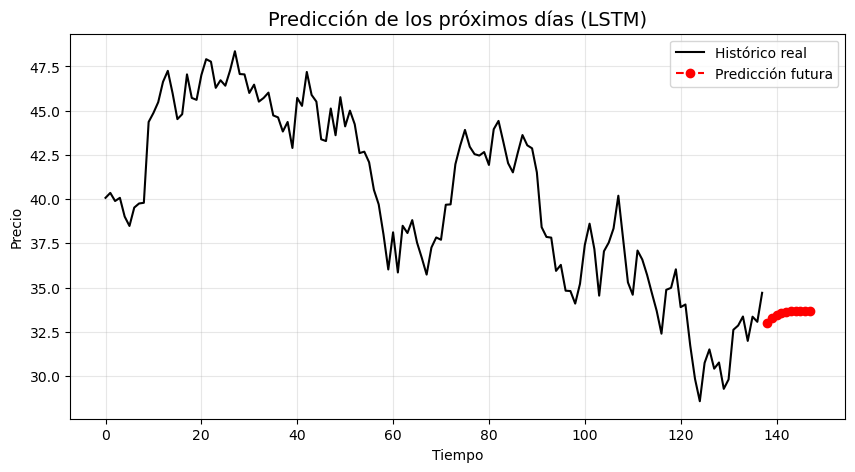

In [8]:
plt.figure(figsize=(10,5))
plt.plot(range(len(y_real)), y_real, label='Histórico real', color='black')
plt.plot(range(len(y_real), len(y_real) + future_days), future_predictions_real, 
         label='Predicción futura', color='red', linestyle='--', marker='o')

plt.title("Predicción de los próximos días (LSTM)", fontsize=14)
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Comparando el coeficiente de determinación ( R² ) de todos los modelos

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Resultados de tus modelos
resultados = {
    'Modelo': ['Decision Tree', 'Random Forest', 'LSTM'],
    'MAE': [0.093, 0.0, 0.056],
    'RMSE': [1.80, 1.79, 1.65, 0.88, 0.43, 1.98 ],
    'R²': [0.93, 0.93, 0.94, 0.98, 0.996, 0.85]
}

df_resultados = pd.DataFrame(resultados)
df_resultados


ValueError: All arrays must be of the same length